## ML REGRESSION ALGORITHMS

Loading the scikit-learn version of the diabetes dataset

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Splitting the dataset into the training and test sets

In [2]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(diabetes['data'],diabetes['target'], random_state=2005)

Implementing Lasso model

Calculating the training and test R2 for the Lasso model using the default parameters

In [3]:
from sklearn.linear_model import Lasso
lasso1 = Lasso().fit(X1_train,y1_train)
training_R2 = lasso1.score(X1_train,y1_train)
test_R2 = lasso1.score(X1_test,y1_test)
print('Training R2 =',training_R2)
print('Test R2 =',test_R2)

Training R2 = 0.3604688303389487
Test R2 = 0.3438980595081287


Checking the features used by Lasso model above

In [4]:
import numpy as np

#Finding how many features are used
feature_count = np.sum(lasso1.coef_ != 0)
print('Count of features used by lasso model =',feature_count)

#Finding the names of used features
feature_indices = np.argwhere(lasso1.coef_ != 0)
features_used = np.array(diabetes['feature_names'])[feature_indices]
print('Features used by Lasso model are:',(features_used.transpose()))

Count of features used by lasso model = 3
Features used by Lasso model are: [['bmi' 'bp' 's5']]


Loading the original version of the diabetes dataset

In [5]:
diabetes_org = np.genfromtxt("diabetes.data", delimiter="\t",skip_header=1)

Splitting the original dataset into the training and test sets

In [6]:
diabetes_data = np.genfromtxt("diabetes.data", delimiter="\t",usecols=np.arange(diabetes_org.shape[1]-1),skip_header=1)
diabetes_target = np.genfromtxt("diabetes.data", delimiter="\t",usecols=diabetes_org.shape[1]-1, dtype='int',skip_header=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(diabetes_data,diabetes_target, random_state=2005)

Implementing Lasso model on original dataset

Calculating the training and test R2 for the Lasso model using the default parameters

In [7]:
lasso2 = Lasso().fit(X2_train,y2_train)
training_R2 = lasso2.score(X2_train,y2_train)
test_R2 = lasso2.score(X2_test,y2_test)
print('Training R2 =',training_R2)
print('Test R2 =',test_R2)

Training R2 = 0.5081103067515702
Test R2 = 0.49876675224257616


Checking the features used by Lasso model above

In [8]:
#Finding how many features are used
feature_count = np.sum(lasso2.coef_ != 0)
print('Count of features used by lasso model =',feature_count)

#Finding the names of used features
feature_indices = np.argwhere(lasso2.coef_ != 0)
features_used = np.array(diabetes['feature_names'])[feature_indices]
print('Features used by Lasso model are:',(features_used.transpose()))

Count of features used by lasso model = 10
Features used by Lasso model are: [['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']]


Preprocessing the training and test sets and avoiding data snooping

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Finding the transformation from the training set
scaler.fit(X2_train)
#To avoid data snooping, same transformation is applied to training and test sets
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

We have now preprocessed the data. We can verify this by checking the standard deviations of our features.

In [10]:
print(np.std(X2_train_scaled,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Implementing the Lasso model on scaled dataset

Calculating the training and test R2 for the Lasso model using the default parameters

In [11]:
lasso3 = Lasso().fit(X2_train_scaled,y2_train)
training_R2 = lasso3.score(X2_train_scaled,y2_train)
test_R2 = lasso3.score(X2_test_scaled,y2_test)
print('Training R2 =',training_R2)
print('Test R2 =',test_R2)

Training R2 = 0.5103864679565968
Test R2 = 0.5059896195946609


Checking the features used by Lasso model above

In [12]:
#Finding how many features are used
feature_count = np.sum(lasso3.coef_ != 0)
print('Count of features used by lasso model =',feature_count)

#Finding the names of used features
feature_indices = np.argwhere(lasso3.coef_ != 0)
features_used = np.array(diabetes['feature_names'])[feature_indices]
print('Features used by Lasso model are:',(features_used.transpose()))

Count of features used by lasso model = 9
Features used by Lasso model are: [['age' 'sex' 'bmi' 'bp' 's1' 's3' 's4' 's5' 's6']]


Varying the regularization parameter α in the Lasso 

In [13]:
#The above calculated lasso3 is calulated against default alpha value 1.0. Now let us vary the alpha value.

#Computing lasso model for following alphas 
alphas = [0.0001,0.001,0.01,0.1,1,10]

#Let us find test R2 and features used for each of the model
test_R2 = []
features_used = []
for a in alphas:
    lasso = Lasso(alpha=a,max_iter=100000).fit(X2_train_scaled,y2_train)
    test_R2.append(lasso.score(X2_test_scaled,y2_test))
    features_used.append(np.sum(lasso.coef_ != 0))

print('Obtained values are as follows:')
for i in range(len(alphas)):
    print("alpha=",alphas[i],": Test R2=",test_R2[i],"\t Features Used=",features_used[i])

Obtained values are as follows:
alpha= 0.0001 : Test R2= 0.5055293533708054 	 Features Used= 10
alpha= 0.001 : Test R2= 0.5055195334302462 	 Features Used= 10
alpha= 0.01 : Test R2= 0.5054156114170519 	 Features Used= 10
alpha= 0.1 : Test R2= 0.5046869922605142 	 Features Used= 10
alpha= 1 : Test R2= 0.5059896195946609 	 Features Used= 9
alpha= 10 : Test R2= 0.45065885109346004 	 Features Used= 4


Plotting the test R2 vs the number of features used (i.e., those with non-zero coefficients).

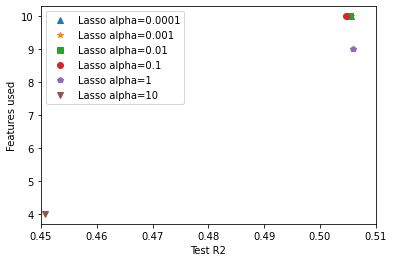

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
symbols = ['^','*','s','o','p','v']
for i,a in enumerate(alphas):
    plt.plot(test_R2[i], features_used[i],symbols[i], label="Lasso alpha="+str(a))
plt.xlim(0.45,0.51)
plt.xlabel("Test R2")
plt.ylabel("Features used")
plt.legend()

9.3) Which point on the curve do you prefer? </br>

###### Alpha = 0.0001,0.001,0.01,0.1
For such small values of alpha, we are using a model with all the 10 features. This means that our result is close to linear regression and we are not performing any model selection. This means we might be overfitting data so the model does not work very great on test set due to lack of generalization.

###### Alpha = 1
In this case, we are using 9 out of 10 features and achieved test R2 is also the highest. So looks like model selection is optimal where removing the one irrelavent feature reduces the model complexity and make it more generalized. This, in turn, helps to achieve good test R2.

###### Alpha = 10
Here, we are using a model with 4 out of 10 features which means there is a higher degree of model selection. But the achieved test R2 is relatively lower in this case. This is because the model complexity is lower and hence we might be undefitting the data. This underfitted model will lack generalization and will lead to poor performance on test set which is why we see lower test R2 in this case. 

Our regularization parameter, alpha, should be a tradeoff of: </br>
<ol><li>Fitting the data well</li>
    <li>Moving the parameter estimates to 0</li></ol>

Hence, <strong>alpha = 1</strong> seems like the most optimal choice achieving highest test R2 at a slightly less complex model using 9 out of 10 features. 

Parameter Selection using Cross Validation

Choosing the regularization parameter for the Lasso using cross-validation on the training set

In [15]:
from sklearn.model_selection import cross_val_score
#Again using the below alphas as potential regularization parameters for Lasso
alphas = [0.0001,0.001,0.01,0.1,1,10]
best_score = 0
for a in alphas:
    lasso = Lasso(alpha=a,max_iter=100000)
    lasso.fit(X2_train_scaled,y2_train)
    # perform cross-validation
    scores = cross_val_score(lasso,X2_train_scaled, y2_train, cv=5)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_alpha = a
print("Best CV score:", best_score)
print("Best regularization parameter alpha:", best_alpha)

Best CV score: 0.47147475080220075
Best regularization parameter alpha: 1


Training the Lasso on the whole training set using the chosen values of the parameters

In [16]:
# rebuild a model on the full training set
lasso = Lasso(alpha=best_alpha)
lasso.fit(X2_train_scaled,y2_train)

Lasso(alpha=1)

Reporting the resulting training and test R2 and the number of features used.

In [17]:
#Reporting the traning R2
train_score = lasso.score(X2_train_scaled,y2_train)
print("Training set score with best parameters:", train_score)

#Reporting the test R2
test_score = lasso.score(X2_test_scaled,y2_test)
print("Test set score with best parameters:", test_score)

#Reporting the number of features used
features_used = np.sum(lasso.coef_ != 0)
print('Number of features used:',features_used)

Training set score with best parameters: 0.5103864679565968
Test set score with best parameters: 0.5059896195946609
Number of features used: 9


### Discussion

The above result in (10) coincides with our preference in (9).
Alpha = 1 gives the best tradeoff between fitting the data well and performing the model selection.

## Inductive Conformal Predictor Implementation

Implementing an inductive conformal predictor

a) Split the training set that you obtained in item 5 into two parts: the calibration set of size 99 and the rest of the training set (the training set proper).

In [18]:
X_train_pr, X_calib, y_train_pr, y_calib = train_test_split(X2_train, y2_train, test_size=99, random_state=2005)

b) Preprocess the training set proper, calibration set, and test set in the same way using StandardScaler. Namely, fit the scaler to the training set proper and then use it to transform all three.

In [19]:
scaler = StandardScaler()
#fitting the scaler to the training set proper 
scaler.fit(X_train_pr)
#transform training set proper
X_train_pr_scaled = scaler.transform(X_train_pr)
#transform calibration set
X_calib_scaled = scaler.transform(X_calib)
# transform test data
X2_test_scaled = scaler.transform(X2_test)

c) Using the nonconformity measure α = |y − yhat|, where y is the true label and yhat is its prediction given the training set proper, for each test sample compute the prediction interval for it. Do this for significance levels 5% and 20%. For each of these significance levels compute:<ul>
<li> the length of the prediction intervals for the test samples </li>
<li> and the test error rate of your inductive conformal predictor. </li> </ul>

###### Fit the Lasso with parameters chosen by cross-validation to the training set proper

In [20]:
#Computing the cross validation for below value of regularization parameter
alphas = [0.0001,0.001,0.01,0.1,1,10,100]
best_score = 0
for a in alphas:
    lasso = Lasso(alpha=a,max_iter=100000)
    lasso.fit(X_train_pr_scaled,y_train_pr)
    # perform cross-validation
    scores = cross_val_score(lasso,X_train_pr_scaled, y_train_pr, cv=5)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_alpha = a
print("Best CV score:", best_score)
print("Best regularization parameter alpha:", best_alpha)

Best CV score: 0.45595297318004324
Best regularization parameter alpha: 1


In [21]:
# rebuild the model with best regularization parameter
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_pr_scaled,y_train_pr)

Lasso(alpha=1)

######  Compute the $\alpha$i for the calibration set by the formula $\alpha$i = |yi − yhati| (yi being the true label and yhat being the Lasso prediction).

In [22]:
#Finding the lasso predictions
yhat = lasso.predict(X_calib_scaled)
#Finding the non conformity scores
alpha_scores = abs(y_calib - yhat)

###### Compute k and c
Defining methods below to compute k

In [23]:
import math
def getk(epsilon,m):
    return math.ceil((1-epsilon)*(m+1))

def getc(k, scores):
    return scores[k-1]

###### Finally, compute the prediction set for each test sample as [yhat−c, yhat+c], yhat being the Lasso prediction for this test sample
Defining a method below that returns the prediction sets for all test samples

In [24]:
def getPredSets(c, X_test):
    """
    Function to return prediction interval lengths
    Input: c and test samples
    Output: Prediction sets upper and lower limits for all test samples
    """
    yhat = lasso.predict(X_test)
    pred_set_min = yhat - c
    pred_set_max = yhat + c
    return pred_set_max, pred_set_min
#Interpretation: For test sample i, the prediction set interval will be [pred_set_min[i],pred_set_max[i]]

 #### Significance level 5%

Computing k and c 

In [25]:
#size of calibration set
m = X_calib_scaled.shape[0]
#significance level 5%
epsilon = 5/100
#computing k
k5 = getk(epsilon, m)
#Sorting the alpha scores
alpha_scores = np.sort(alpha_scores)
#computing c
c5 = getc(k5, alpha_scores)
print('Value of k for significance level 5%:',k5)
print('Value of c for significance level 5%:',c5)

Value of k for significance level 5%: 95
Value of c for significance level 5%: 107.92978677890349


Computing the length of the prediction intervals for the test samples

In [26]:
pred_set_max, pred_set_min = getPredSets(c5, X2_test_scaled)
pred_interval_lengths = pred_set_max - pred_set_min + 1
#The length of the prediction intervals for all the test samples will be same as it depends only on c:
#The length of interval [yhat−c, yhat+c] will be (yhat+c) - (yhat−c) + 1 = 2c+1.
#So we can take any value from the above pred_interval_lengths.
print('Length of prediction intervals for all test samples at significance level 5%:',pred_interval_lengths[0])

Length of prediction intervals for all test samples at significance level 5%: 216.85957355780695


Computing the test error rate of inductive conformal predictor

In [27]:
errors = 0
test_set_size = len(y2_test)
for i in range(test_set_size):
    if pred_set_min[i] > y2_test[i] or y2_test[i] > pred_set_max[i]:
        errors = errors + 1
error_rate = errors/test_set_size
print('Test error rate at significance level 5%:',error_rate)

Test error rate at significance level 5%: 0.04504504504504504


 #### Significance level 20%

Computing k and c 

In [28]:
#size of calibration set
m = X_calib_scaled.shape[0]
#significance level 5%
epsilon = 20/100
#computing k
k20 = getk(epsilon, m)
#Sorting the alpha scores
alpha_scores = np.sort(alpha_scores)
#computing c
c20 = getc(k20, alpha_scores)
print('Value of k for significance level 5%:',k20)
print('Value of c for significance level 5%:',c20)

Value of k for significance level 5%: 80
Value of c for significance level 5%: 77.67186206665784


Computing the length of the prediction intervals for the test samples

In [29]:
pred_set_max, pred_set_min = getPredSets(c20, X2_test_scaled)
pred_interval_lengths = pred_set_max - pred_set_min + 1
#The length of the prediction intervals for all the test samples will be same as it depends only on c:
#The length of interval [yhat−c, yhat+c] will be (yhat+c) - (yhat−c) + 1 = 2c+1.
#So we can take any value from the above pred_interval_lengths.
print('Length of prediction intervals for all test samples at significance level 20%:',pred_interval_lengths[0])

Length of prediction intervals for all test samples at significance level 20%: 156.34372413331567


Computing the test error rate of inductive conformal predictor

In [30]:
errors = 0
test_set_size = len(y2_test)
for i in range(test_set_size):
    if pred_set_min[i] > y2_test[i] or y2_test[i] > pred_set_max[i]:
        errors = errors + 1
error_rate = errors/test_set_size
print('Test error rate at significance level 20%:',error_rate)

Test error rate at significance level 20%: 0.12612612612612611


#### <em>End of notebook</em>